In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O6','C6']
psi_dihedral=['C1','O6','C6','C5']

di_sugar=['MAN', 'MAN']
di_sugar2= ['DManpa', 'DManpa']
link= '1-6'
patterns1= [di_sugar[0]+'(*_*_)]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-'+di_sugar[1]+'(*_*_)',di_sugar[0]+'(*_*_)]-[*]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-[*]-'+di_sugar[1]+'(*_*_)']
patterns2= [di_sugar2[0]+link+di_sugar2[1], di_sugar2[0]+link+']'+di_sugar2[1], di_sugar2[0]+link+'[*]'+di_sugar2[1]]
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-6D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A7C', '1ABR', '1ABR', '1AGM', '1AH1', '1AU1', '1AU1', '1AX0', '1AX1', '1AX2', '1AXY', '1AXZ', '1B0F', '1B0F', '1B37', '1B41', '1B5F', '1B5Q', '1BHG', '1BHG', '1BLF', '1BRR', '1BRR', '1BZB', '1C1Z', '1CDR', '1CF5', '1CF5', '1CKL', '1CKL', '1CKL', '1CKL', '1CPO', '1CVI', '1CVI', '1CVI', '1CVI', '1CVN', '1CVN', '1CVN', '1CVN', '1CVU', '1CVU', '1CXP', '1CXP', '1D2V', '1D2V', '1D5L', '1D5L', '1D7W', '1D7W', '1DEO', '1DEX', '1DGL', '1DGL', '1DIY', '1DL2', '1DN2', '1DN2', '1DNU', '1DNU', '1DNW', '1DNW', '1DOG', '1DP5', '1DPJ', '1DWA', '1DWF', '1DWG', '1DWH', '1DWI', '1DWJ', '1DZE', '1E04', '1E05', '1E4K', '1E4K', '1E6Q', '1E6S', '1EOM', '1ETH', '1ETH', '1EX1', '1F6A', '1F6A', '1F6A', '1F6A', '1F8B', '1F8C', '1F8D', '1F8E', '1F8R', '1F8R', '1F8R', '1FC1', '1FC1', '1FC2', '1FE2', '1FE8', '1FE8', '1FE8', '1FI1', '1FRT', '1FRT', '1FUJ', '1FUJ', '1FUJ', '1FUJ', '1FX5', '1FZD', '1FZD', '1FZD', '1FZD', '1G0V', '1G6I', '1G6I

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 42 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

normalization error 1 SER /B:1
prev: 0 0 0
this: 0.065734 -0.104166 1.36032
guide: 0 0 -0
normalization error 1 SER /B:1
prev: 0 0 0
this: 0.065734 -0.104166 1.36032
guide: 0 0 -0
normalization error 1 SER /B:1
prev: 0 0 0
this: 0.065734 -0.104166 1.36032
guide: 0 0 -0
normalization error 1 SER /B:1
prev: 0 0 0
this: 0.065734 -0.104166 1.36032
guide: 0 0 -0
normalization error 1 SER /B:1
prev: 0 0 0
this: 0.065734 -0.104166 1.36032
guide: 0 0 -0
normalization error 1 SER /B:1
prev: 0 0 0
this: 0.065734 -0.104166 1.36032
guide: 0 0 -0


Executed 42 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 4141 
valid torsion1 and torsion2: (4141, 4141)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['6.C', '3.C'], ['4C1', '4C1'])
(['4.C', '3.C'], ['4C1', '4C1'])
(['4.C', '3.C'], ['-', '1S3'])
(['5.C', '3.C'], ['-', '1S3'])
(['8.P', '7.P'], ['4C1', '4C1'])
(['8.M', '7.M'], ['4C1', '4C1'])
(['5.F', '4.F'], ['4C1', '-'])
(['6.F', '4.F'], ['4C1', '-'])
(['5.E', '4.E'], ['4C1', '-'])
(['6.E', '4.E'], ['4C1', '-'])
(['5.I', '4.I'], ['4C1', '4C1'])
(['6.I', '4.I'], ['4C1', '4C1'])
(['5.F', '4.F'], ['4C1', '4C1'])
(['6.F', '4.F'], ['4C1', '4C1'])
(['5.A', '4.A'], ['4C1', '4C1'])
(['6.A', '4.A'], ['4C1', '4C1'])
(['5.E', '4.E'], ['4C1', '4C1'])
(['6.E', '4.E'], ['4C1', '4C1'])
(['7.F', '4.F'], ['4C1', '4C1'])
(['6.F', '5.F'], ['4C1', '4C1'])
(['5.F', '4.F'], ['4C1', '4C1'])
(['7.F', '6.F'], ['4C1', '4C1'])
(['5.F', '4.F'], ['4C1', '4C1'])
(['5.C', '4.C'], ['4C1', '4C1'])
(['7.V', '4.V'], ['4C1', '4C1'])
(['6.V', '5.V'], ['4C1', '4C1'])
(['9.V', '8.V'], ['4C1', '4C1'])
(['5.V', '4.V'], ['4C1', '4C1'])
(['5.P', '4.P'], ['4C1', '4C1'])
(['7.S', '6.S'], ['4C1', '4C1'])
(['5.S', '4.S'], ['4C1

In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//8api.pdb C MAN 6 C1
../../pdbs//8api.pdb C MAN 3 O6
3056 3030
No connection found between 3056 and 3030
0
../../pdbs//8api.pdb C MAN 4 C1
../../pdbs//8api.pdb C MAN 3 O6
3031 3030
Connection found between 3031 and 3030
../../pdbs//4mqe.pdb C MAN 4 C1
../../pdbs//4mqe.pdb C MAN 3 O6
6543 6542
No connection found between 6543 and 6542
2
../../pdbs//4mqe.pdb C MAN 5 C1
../../pdbs//4mqe.pdb C MAN 3 O6
6554 6542
Connection found between 6554 and 6542
../../pdbs//7l56.pdb P MAN 8 C1
../../pdbs//7l56.pdb P MAN 7 O6
26092 26091
Connection found between(2) 26092 and 26091
../../pdbs//7l56.pdb M MAN 8 C1
../../pdbs//7l56.pdb M MAN 7 O6
25939 25938
Connection found between(2) 25939 and 25938
../../pdbs//5nqw.pdb F MAN 5 C1
../../pdbs//5nqw.pdb F MAN 4 O6
5364 5363
No connection found between 5364 and 5363
6
../../pdbs//5nqw.pdb F MAN 6 C1
../../pdbs//5nqw.pdb F MAN 4 O6
5375 5363
Connection found between 5375 and 5363
../../pdbs//5nqw.pdb E MAN 5 C1
../../pdbs//5nqw.pdb E MAN 4 O6
528

In [13]:
outfile_name = di_sugar2[0]+link+di_sugar2[1]

In [14]:
output_df.to_csv(outfile_name+'_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv(outfile_name+'_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [15]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [16]:
output_df

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,8api.pdb,C MAN 4 C2 C1 MAN 3 O6 C6,C MAN 4 C1 MAN 3 O6 C6 C5,126.3680,69.8673,"([MAN(4_C_), MAN(3_C_)], [22.3, 33.99])",NAG(5_C_)-MAN(4_C_)-[MAN(6_C_)]-MAN(3_C_)-NAG(...,DGlcpNAcb1-2DManpa1-6[DManpa1-3]DManpa1-4DGlcp...,"([4.C, 3.C], [4C1, 4C1])"
1,4mqe.pdb,C MAN 5 C2 C1 MAN 3 O6 C6,C MAN 5 C1 MAN 3 O6 C6 C5,293.2284,176.6610,"([MAN(5_C_), MAN(3_C_)], [98.4, 92.42])",FUC(6_C_)-[MAN(5_C_)-[MAN(4_C_)]-MAN(3_C_)-NAG...,DManpa1-3[DManpa1-6]DManpa1-4DGlcpNAcb1-4[LFuc...,"([5.C, 3.C], [-, 1S3])"
2,7l56.pdb,P MAN 8 C2 C1 MAN 7 O6 C6,P MAN 8 C1 MAN 7 O6 C6 C5,200.8970,226.6570,"([MAN(8_P_), MAN(7_P_)], [97.31, 94.85])",GAL(6_P_)-NAG(5_P_)-MAN(4_P_)-[MAN(8_P_)-MAN(7...,DGalpb1-4DGlcpNAcb1-2DManpa1-6[DManpa1-6DManpa...,"([8.P, 7.P], [4C1, 4C1])"
3,7l56.pdb,M MAN 8 C2 C1 MAN 7 O6 C6,M MAN 8 C1 MAN 7 O6 C6 C5,194.4080,214.5410,"([MAN(8_M_), MAN(7_M_)], [107.27, 106.49])",MAN(8_M_)-MAN(7_M_)-[GAL(6_M_)-NAG(5_M_)-MAN(4...,DGalpb1-4DGlcpNAcb1-2DManpa1-3[DManpa1-6DManpa...,"([8.M, 7.M], [4C1, 4C1])"
4,5nqw.pdb,F MAN 6 C2 C1 MAN 4 O6 C6,F MAN 6 C1 MAN 4 O6 C6 C5,193.0930,175.8800,"([MAN(6_F_), MAN(4_F_)], [138.07, 110.97])",MAN(6_F_)-[MAN(5_F_)]-MAN(4_F_)-[MAN(7_F_)]-BM...,DManpa1-3[DManpa1-6]DManpa1-6[DManpa1-3]DManpb...,"([6.F, 4.F], [4C1, -])"
...,...,...,...,...,...,...,...,...,...
1436,5m8s.pdb,K MAN 5 C2 C1 MAN 3 O6 C6,K MAN 5 C1 MAN 3 O6 C6 C5,180.2810,96.4842,"([MAN(5_K_), MAN(3_K_)], [70.49, 57.62])",FUC(6_K_)-[MAN(5_K_)-[MAN(4_K_)]-MAN(3_K_)-NAG...,DManpa1-3[DManpa1-6]DManpa1-4DGlcpNAcb1-4[LFuc...,"([5.K, 3.K], [14B, -])"
1437,7zlk.pdb,X MAN 6 C2 C1 MAN 4 O6 C6,X MAN 6 C1 MAN 4 O6 C6 C5,201.2540,89.4695,"([MAN(6_X_), MAN(4_X_)], [126.23, 125.66])",MAN(6_X_)-[MAN(5_X_)]-MAN(4_X_)-[MAN(7_X_)]-BM...,DManpa1-3[DManpa1-6]DManpa1-6[DManpa1-3]DManpb...,"([6.X, 4.X], [4C1, 4C1])"
1438,7zlk.pdb,J MAN 6 C2 C1 MAN 4 O6 C6,J MAN 6 C1 MAN 4 O6 C6 C5,213.4780,204.7140,"([MAN(6_J_), MAN(4_J_)], [172.1, 154.51])",MAN(6_J_)-[MAN(5_J_)]-MAN(4_J_)-[MAN(7_J_)]-BM...,DManpa1-3[DManpa1-6]DManpa1-6[DManpa1-3]DManpb...,"([6.J, 4.J], [4C1, 4C1])"
1439,7zlk.pdb,c MAN 6 C2 C1 MAN 4 O6 C6,c MAN 6 C1 MAN 4 O6 C6 C5,170.5660,58.4773,"([MAN(6_c_), MAN(4_c_)], [169.7, 163.16])",MAN(6_c_)-[MAN(5_c_)]-MAN(4_c_)-[MAN(7_c_)]-BM...,DManpa1-3[DManpa1-6]DManpa1-6[DManpa1-3]DManpb...,"([6.c, 4.c], [4C1, 4C1])"


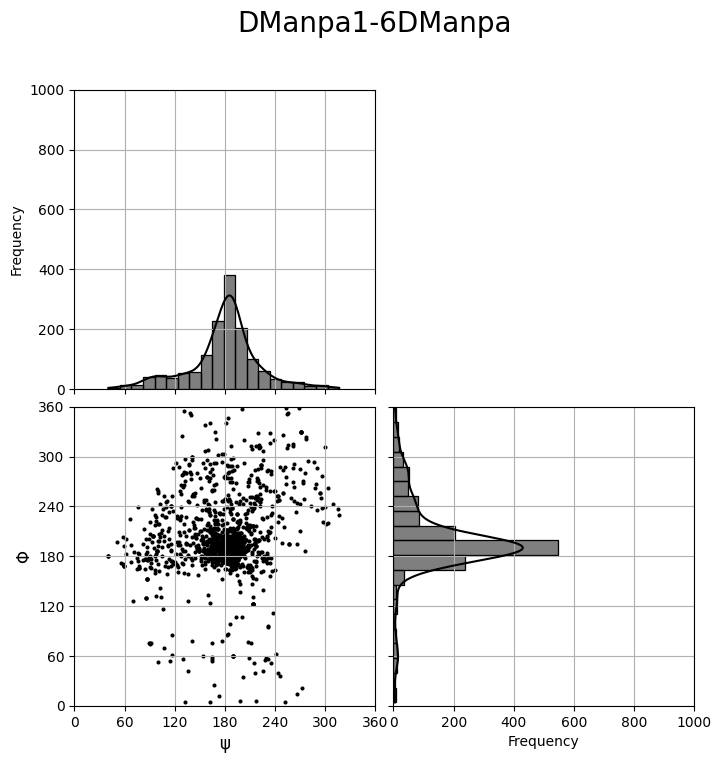

In [18]:
instant1.plot(torsions=output_df, title=outfile_name,max_histogram_scale=1000,step_histogram_tick=200)